In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [7]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [6]:
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [8]:
"""
num_workers (int, optional) – how many subprocesses to use for data loading. 
      0 means that the data will be loaded in the main process. (default: 0)
"""

batch_size = 4

trainloader = torch.utils.data.DataLoader(
    dataset=trainset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2
)

testloader = torch.utils.data.DataLoader(
    dataset=testset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2
)

In [14]:
classes = ('plane',
           'car',
           'bird',
           'cat',
           'deer',
           'dog',
           'frog',
           'horse',
           'ship',
           'truck')

<class 'numpy.ndarray'>
(3, 36, 138)
(36, 138, 3)


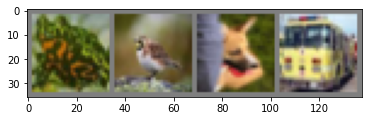

 frog  bird   dog truck


In [28]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy() # torch.Tensor -> numpy.ndarray
  print(npimg.shape) # (3, 36, 138)
  print(np.transpose(npimg, (1, 2, 0)).shape) # (36, 138, 3) : height * width * dimension
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

data_iter = iter(trainloader)
images, labels = data_iter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))


In [64]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5) # input dim, output dim, kernel size
    self.conv2 = nn.Conv2d(6, 16, 5) # padding : 0
    self.pool = nn.MaxPool2d(2, 2)
    self.fc = nn.Linear(16 * 5 * 5, 10)
    # self.fc1 = nn.Linear(16 * 5 * 5, 120)
    # self.fc2 = nn.Linear(120, 84)
    # self.fc3 = nn.Linear(84, 10)

  # propagation
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x))) # convolution layer 1
    # print('before conv ', x.shape) # torch.Size([4, 6, 14, 14])
    # x = self.conv2(x)
    # print('after conv ', x.shape) # torch.Size([4, 16, 10, 10])
    # x = F.relu(x)
    # print('before pool ', x.shape) # torch.Size([4, 16, 10, 10])
    # x = self.pool(x)
    # print('after pool', x.shape, '\n') # torch.Size([4, 16, 5, 5]) 
    x = self.pool(F.relu(self.conv2(x))) # convolution layer 2
    x = x.view(-1, 16 * 5 * 5)

    # x = F.relu(self.fc1(x)) # fully-connected layer 1
    # x = F.relu(self.fc2(x)) # fully-connected layer 2
    # x = self.fc3(x) # fully-connected layer 3
    x = self.fc(x)
    return x

net = Net()

In [65]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),
                      lr=0.001, # learning rate
                      momentum=0.9) # prevent local minima

In [66]:
epoch = 4
for e in range(epoch):
  running_loss = 0.0
  for i, (inputs, labels) in enumerate(trainloader):
    optimizer.zero_grad()
    outputs = net(inputs)
    
    # calculate parameters (W, b)
    loss = criterion(outputs, labels) # prediction, answer
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i%2000 == 1999:
      print(f'[{e+1}, {i+1}] : {running_loss/2000}')
      running_loss = 0.0

[1, 2000] : 1.957345077365637
[1, 4000] : 1.6467055773139
[1, 6000] : 1.532064227618277
[1, 8000] : 1.4714772077202798
[1, 10000] : 1.4247631768733262
[1, 12000] : 1.397734217211604
[2, 2000] : 1.3666866200193764
[2, 4000] : 1.3401884421482682
[2, 6000] : 1.3151752795316278
[2, 8000] : 1.314557262070477
[2, 10000] : 1.2820173431038857
[2, 12000] : 1.2911149809509517
[3, 2000] : 1.2518748253844678
[3, 4000] : 1.2410552170351148
[3, 6000] : 1.252576166637242
[3, 8000] : 1.2248330312389881
[3, 10000] : 1.238189043149352
[3, 12000] : 1.2308752668835223
[4, 2000] : 1.1969615321569145
[4, 4000] : 1.2068078827075661
[4, 6000] : 1.185280005922541
[4, 8000] : 1.1812274795752018
[4, 10000] : 1.219347586747259
[4, 12000] : 1.226448089901358
